# Notebook to make Figure 9

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')
# custom colormap 
cmap = LinearSegmentedColormap.from_list("my_cmap", [cp[0], cp2[2], cp[8] , cp2[3], cp[3]])

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_SNRs/'

### Setup

Load data

In [1]:
# Load in JSDs
JS_vs_time = h5ify.load(data_dir+'JSDs_different_RD_SNRs.h5')
jsds_background_dict = h5ify.load(data_dir+'JSD_background.h5')

Set up plotting aesthetics

In [2]:
# parameters to plot
params_to_plot = ['chi_p', 'chi_eff', 'mtotal', 'q']

# SNRs to plot
SNRs_to_plot = ['SNR 25', 'SNR 30', 'SNR 40', 'SNR 50', 'SNR 75', 'SNR 100']

### Make Figure

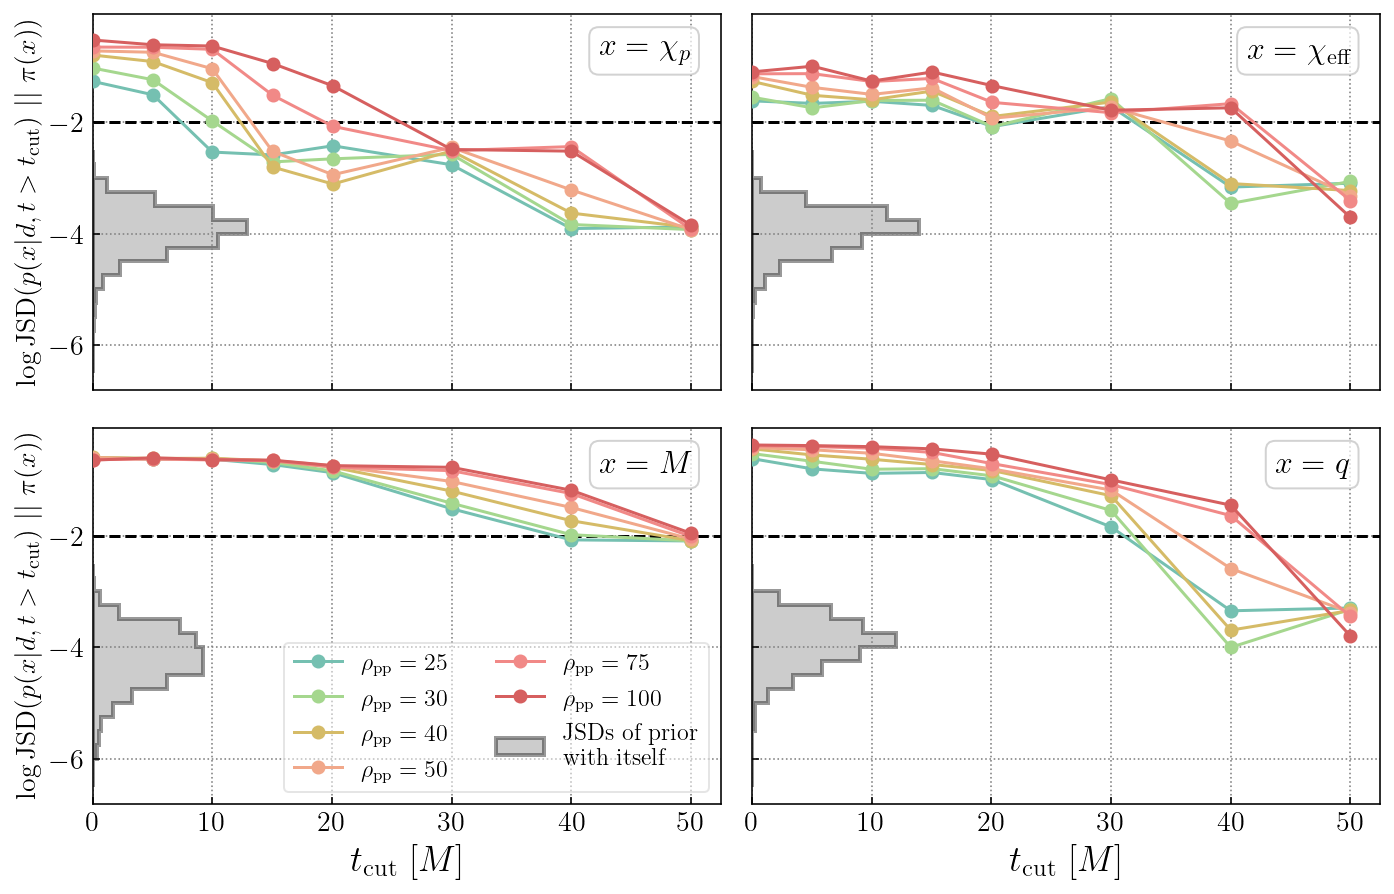

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(pf.DEFAULT_FIG_WIDTH,  1.7 *pf.DEFAULT_FIG_WIDTH/2.7), sharex=True, sharey=True)

# cycle through the parameters
for p, ax in zip(params_to_plot, axes.flatten()):

    i = 0
    for k in SNRs_to_plot:
        SNR = k.split('SNR ')[-1]
        
        v = JS_vs_time[k]
    
        ax.plot(v[p]['tcuts_M'], np.log10(v[p]['JS_divs']), zorder=3, color=cmap((i+1)/6), marker='o', 
                 label=fr'$\rho_\mathrm{{pp}}= {SNR}$')
        i+=1

    l = pf.params[p]    
    ax.text(0.95, 0.94, fr'$x={l}$', transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', 
                   bbox=dict(facecolor='white', edgecolor='silver', boxstyle='round', alpha=0.7), fontsize=16)
    
    ax.axhline(-2, color='k',ls='--')
    
    ax.hist(np.log10(jsds_background_dict[p]), bins=np.linspace(-6.5,-2.5,17), weights=0.1*np.ones(len(jsds_background_dict[p])), edgecolor='k',
            orientation='horizontal', color='gray', histtype='stepfilled', alpha=0.4, lw=2, label='JSDs of prior\nwith itself')
        
axes[-1][0].legend(fontsize=12, ncols=2, loc='lower right', frameon=True, fancybox=True, framealpha=0.5)

for ax in axes[-1]:
    ax.set_xlabel(r'$t_\mathrm{cut}~[M]$')
for ax in axes[:,0]:
    ax.set_ylabel(fr'$\log \mathrm{{JSD}}(p(x| d, t>t_\mathrm{{cut}})~||~ \pi(x))$', fontsize=14)

plt.subplots_adjust(hspace=0.1, wspace=0.05)
plt.savefig('figure_09.png', dpi=300, bbox_inches='tight')
plt.show()